## Warnings

![](https://drive.google.com/uc?id=1OkJ2OAGLnARQ--OxBmII8hDu7PoOFw2a)

I highly advise you _not_ to look through this notebook for the following reasons:
- It is plagiarized both in text and code - if I get time I will address this ...    
- It's a hodgepodge of code - it is, without reservation, unforgivable and unsightly

You have been forewarned!


### Credits

- [Chris McCormick](https://mccormickml.com/)
- [Harrison Kinsley](https://nnfs.io/)
- [Tariq Rashid](https://www.amazon.com/Tariq-Rashid/e/B01N1YH9L9%3Fref=dbs_a_mng_rwt_scns_share)
- [Aurélien Géron](https://www.amazon.com/Aur%25C3%25A9lien-G%25C3%25A9ron/e/B004MOO740?ref=sr_ntt_srch_lnk_1&qid=1641733203&sr=8-1)
- [Arseny Turin](https://medium.com/@arseniytyurin)
- [Tobias Roeschl](https://medium.com/@tobi.roeschl)
- [Grant Sanderson](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

## The Why 

While we won't be discussing neural networks directly in this notebook, we will be showing most of the key building blocks used therein:
- Cost Functions
- Loss Landscape
- Derivatives and Gradients
- Gradient Descent
- Learning Rates
- Model Training

In other words, the jump from what we'll learn here to then understanding neural networks is actually relatively minor. 

## Honest Reliable Dependencies

In [4]:
!pip3 install celluloid==0.2.0

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from IPython.display import HTML
from IPython.display import Image

%matplotlib inline

## Utterly Bogus Chipmunk Facts

Let's observe a family of chipmunks as they move into a new area. 

As the weeks go by does the burrow nest move deeper into the earth?

<br><br>

![](https://drive.google.com/uc?id=1XuYQPu3c04u6HiHQCBE9VGFSASqmHbrb)

<br>

![](https://drive.google.com/uc?id=1iMov67Dvf-RI2wEkz3nEyfZu5X2RsMGd)

### The Chimpunk Data

In [ ]:
CHIPMUNK_DATA = {    
    'weeks': np.array([[1], [2], [4], [5], [6], [7]]),
    'level': np.array([[4], [-12], [3], [-11], [-5], [-17]])  
}

### Plot

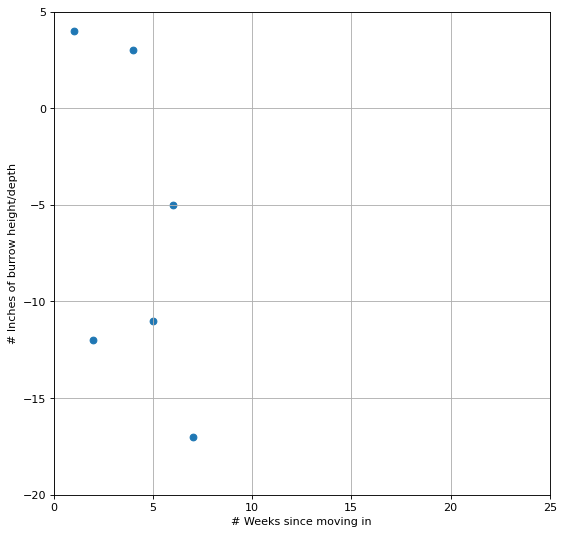

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)

plt.scatter(
    CHIPMUNK_DATA['weeks'], 
    CHIPMUNK_DATA['level']
)

plt.xlabel('# Weeks since moving in')
plt.ylabel('# Inches of burrow height/depth')
plt.xlim(0,25)
plt.ylim(-20,5)
plt.grid()
plt.show()

### Side note

Notice how the graph can look quite different if we don't scale the axes equally:

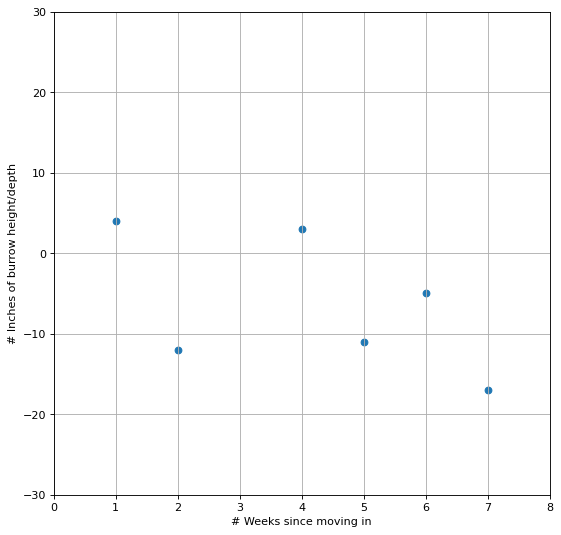

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)

plt.scatter(
    CHIPMUNK_DATA['weeks'], 
    CHIPMUNK_DATA['level']
)

plt.xlabel('# Weeks since moving in')
plt.ylabel('# Inches of burrow height/depth')
plt.xlim(0,8)
plt.ylim(-30,30)
plt.grid()
plt.show()

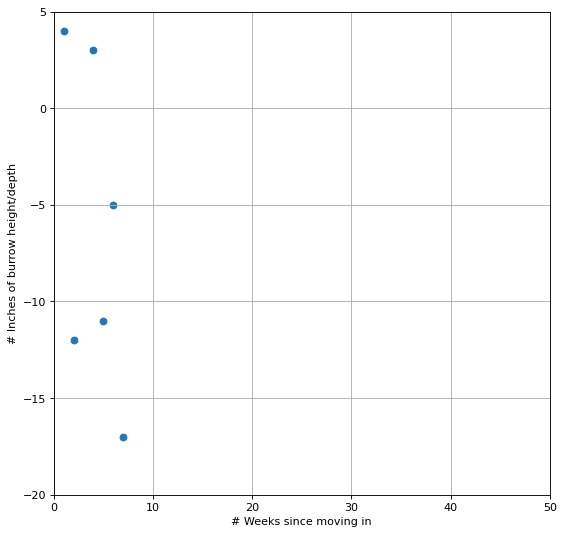

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)

plt.scatter(
    CHIPMUNK_DATA['weeks'], 
    CHIPMUNK_DATA['level']
)

plt.xlabel('# Weeks since moving in')
plt.ylabel('# Inches of burrow height/depth')
plt.xlim(0,50)
plt.ylim(-20,5)
plt.grid()
plt.show()

## A Line

Before we attempt to find a line that "fits" our data, let's recall what a line is:

$\large y=mx+b$

- $m$: slope 
- $b$: y-intercept

### An example

In [ ]:
def line(xs, m, b):
    return [m * x + b for x in xs]  

In [ ]:
xs = list(range(-10,11))
m = 2
b = 3

ys = line(xs, m, b)

print(xs)
print(ys)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[-17, -15, -13, -11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


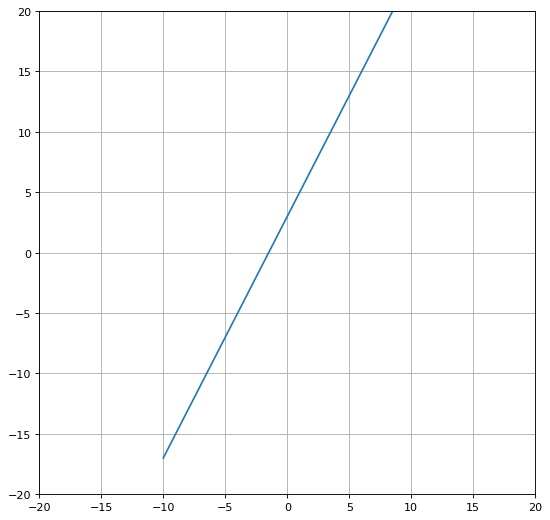

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plt.plot(xs, ys)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.grid()
plt.show()

### Some random examples

We'll keep the input ($-10$ thru $10$) the same and just randomly assign the $\large m$ and $\large b$ values between $-3$ and $3$

In [ ]:
import random

In [ ]:
xs = list(range(-10,11))

results = []
for row in range(3):
    for col in range(2):
        m = random.uniform(-3, 3)
        b = random.uniform(-3, 3)
        results.append({
            'row': row, 
            'col': col,
            'xs': xs,
            'ys': [m * x + b for x in xs],
            'm': m,
            'b': b   
        })
        
# print(results[0])        
        

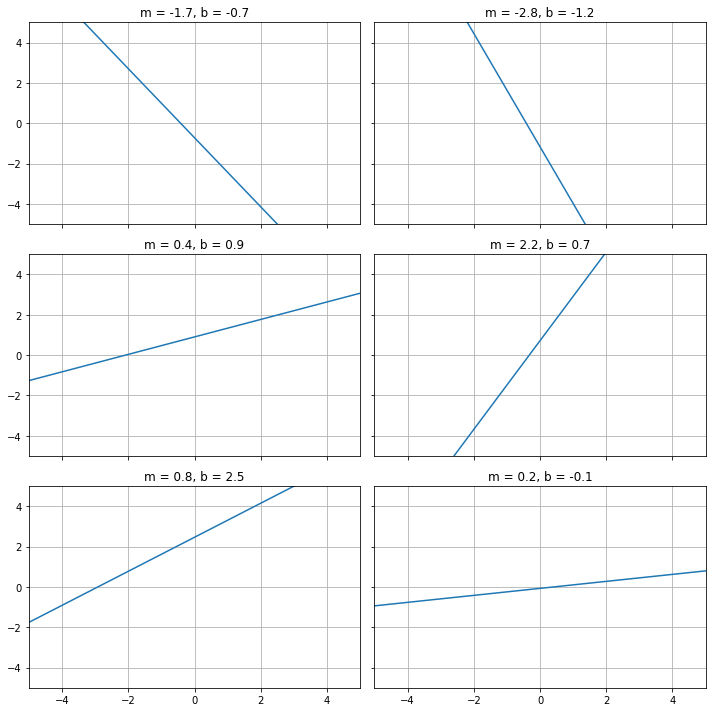

In [ ]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 10))

for r in results:
    axs[r['row'], r['col']].plot(r['xs'], r['ys'])
    axs[r['row'], r['col']].set_title(f"m = {r['m']:.1f}, b = {r['b']:.1f}")
    axs[r['row'], r['col']].grid()

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()      

## Back to Biz

Getting back to our chipmunk example, can we find a line that will fit our data? 

In other words if someone tells us they observed a family of chipmunks live an area for $\large x$ weeks, what would be a good guess on the burrow depth?  

### Overly Simplistic Approach

Let's give try using the average (mean and median):

In [ ]:
level_mean = np.mean(CHIPMUNK_DATA['level'])
level_median = np.median(CHIPMUNK_DATA['level'])

print(level_mean, level_median)

-6.333333333333333 -8.0


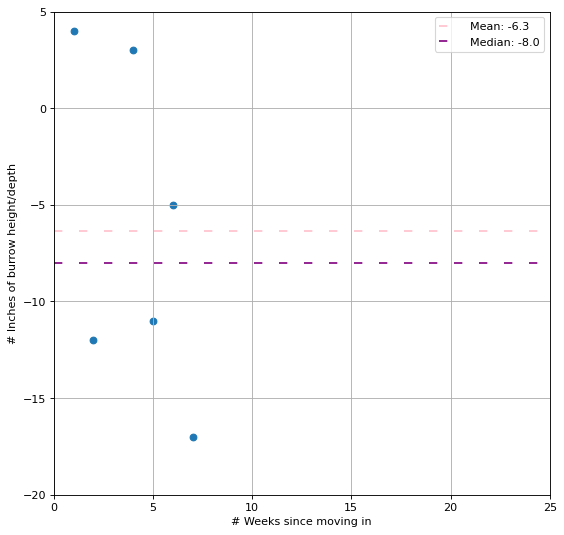

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)

plt.scatter(
    CHIPMUNK_DATA['weeks'], 
    CHIPMUNK_DATA['level']
)

plt.axhline(
    y = level_mean,
    color  = 'pink',
    label  = f'Mean: {level_mean:.1f}',
    dashes = [5, 10] 
)

plt.axhline(
    y = level_median,
    color  = 'purple',
    label  = f'Median: {level_median:.1f}',
    dashes = [5, 10] 
)

plt.xlabel('# Weeks since moving in')
plt.ylabel('# Inches of burrow height/depth')
plt.legend(loc='upper right')
plt.xlim(0,25)
plt.ylim(-20,5)
plt.grid()
plt.show()

But ... nah, we can do much better.

In [6]:
Image(url='https://drive.google.com/uc?id=1IBO0FmcHUY1o_IZ4kWt0TYpmdAcfktmw')

## A Line that Fits

Let's find a line that **_fits_** the data somehow. In other words, let's find the appropriate $\large m$ and $\large b$, so that we can plug in any $\large x$ (number of weeks living in area) and we'll get a decent result on how deep the burrow is. 

What should be the $\large m$ and $\large b$ in our new function $\large f(x) = \hat{y} = mx + b$ ?

## The Linear Regression Model

**Goal:** find the best fitting, straight line for our data. 

> NOTE: before continuing, let's start using $\large w$ (as in "weight") instead of $\large m$ for our slope variable. This is the standard notation, especially when we start adding multiple weight inputs, such as in Multiple Linear Regression.
 



### MSE Cost Function

There are numerous methods on how to determine the optimal values for $\large w$ and $\large b$ given our $\large n$ number of data points (in our case $\large n = 6$).

In this exercise we'll use the gradient descent algorithm (described later) to **minimize** the **mean squared error (MSE)** between observed data points $\large y$ and points we predicted with our regression line $\large \hat{y}$. 

![](https://drive.google.com/uc?id=12VMJ32y7y1cH4JX0WcRjEyYtm7URYtD5)




The mean squared error is also referred to as the **cost function** usually denoted as $\large J$.

![](https://drive.google.com/uc?id=1pob5wjg5ajbS8ok8PfkAIgOgkOr70rzS)


- $\large n$:	number of data points
- $\large y_{i}$: observed values
- $\large \hat{y}_{i}$: predicted values




### Manual Attempts

#### Some funcs

In [ ]:
import math

In [ ]:
def mse_loss(ys, pred_ys):
    squared_error = [(y[0] - y[1]) ** 2 for y in zip(ys, pred_ys)] 
    return np.array(squared_error).mean()  
      

def mse(xs, ys, model_w, model_b):
    xs = xs.flatten()
    ys = ys.flatten()

    model_line_xs = list(range(-100,100))
    model_line_ys = [model_w * x + model_b for x in model_line_xs]
    predicted_ys_for_orig_xs = [model_w * x + model_b for x in xs]

    loss = mse_loss(ys, predicted_ys_for_orig_xs)

    return {
        'model_line_xs': model_line_xs,
        'model_line_ys': model_line_ys,
        'predicted_ys_for_orig_xs': predicted_ys_for_orig_xs,
        'loss': loss
    }

In [ ]:
def mse_plot(xs, ys, model_w, model_b):
    model_results = mse(
        xs = xs, 
        ys = ys, 
        model_w = model_w, 
        model_b = model_b
    )

    plt.figure(figsize=(10,10))

    plt.plot(
        model_results['model_line_xs'], 
        model_results['model_line_ys'],
        color='r', 
        label=f"Model Line: {model_w} * x + {model_b}"
    )

    plt.scatter(
        xs, 
        ys,
        marker='x', 
        s=44
    )

    # plot connecting lines
    plt.vlines(
        xs, 
        ymin=ys, 
        ymax=model_results['predicted_ys_for_orig_xs'],
        linestyle="dashed",
        color='r',
        alpha=0.3
    )    

    plt.title(f"MSE Loss: {model_results['loss']:.2f}")
    plt.xlabel('# Weeks since moving in')
    plt.ylabel('# Inches of burrow height/depth')
    plt.legend(loc='upper right')
    plt.xlim(0,25)
    plt.ylim(-20,5)
    plt.grid()
    plt.show()

#### w=-.5 b=-1

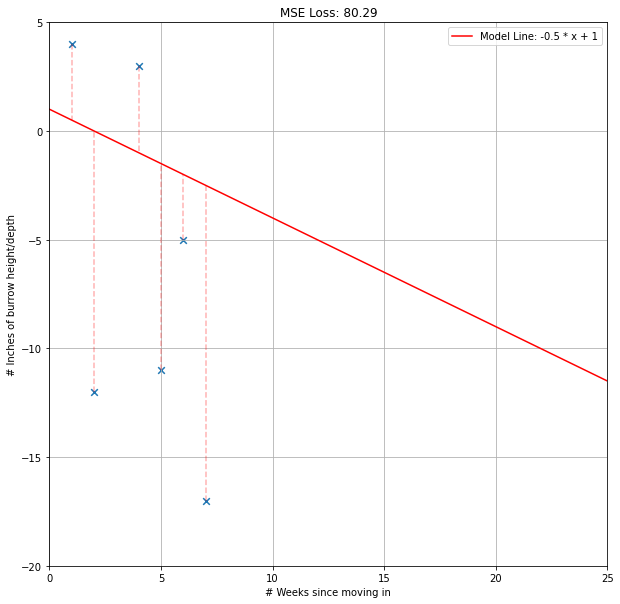

In [ ]:
model_w = -.5 
model_b = 1

mse_plot(
    xs = CHIPMUNK_DATA['weeks'], 
    ys = CHIPMUNK_DATA['level'], 
    model_w = model_w, 
    model_b = model_b
)

#### w=-1.5 b=-1.5

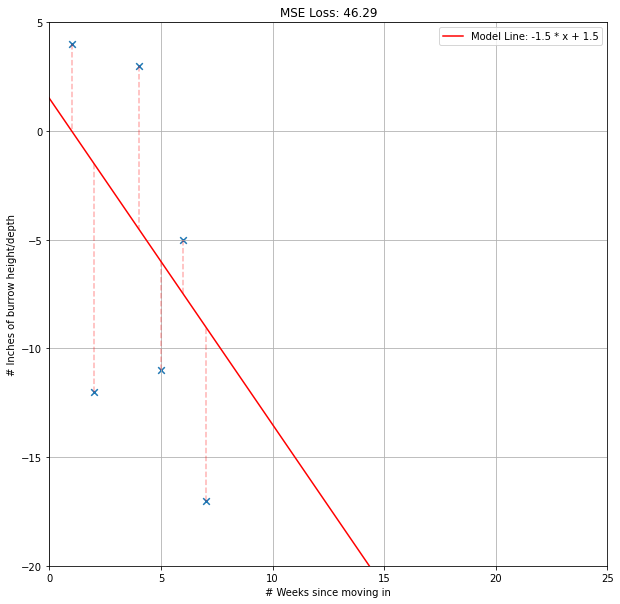

In [ ]:
model_w = -1.5 
model_b = 1.5

mse_plot(
    xs = CHIPMUNK_DATA['weeks'], 
    ys = CHIPMUNK_DATA['level'], 
    model_w = model_w, 
    model_b = model_b
)

#### w=-2 b=-2

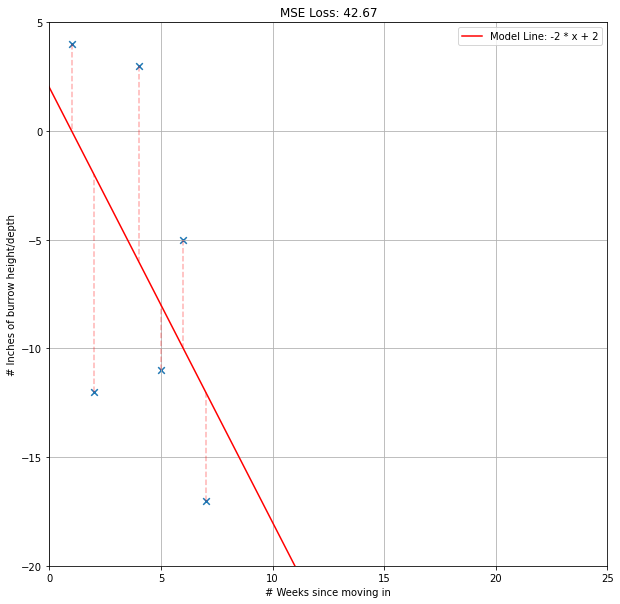

In [ ]:
model_w = -2
model_b = 2

mse_plot(
    xs = CHIPMUNK_DATA['weeks'], 
    ys = CHIPMUNK_DATA['level'], 
    model_w = model_w, 
    model_b = model_b
)

### Key Takeaway

The **key takeaway** is; we have an ordinary simple function that allows us to see how our model is performing. This idea of a **loss function** is crucial. 

![](https://drive.google.com/uc?id=1pob5wjg5ajbS8ok8PfkAIgOgkOr70rzS)


```python
def mse_loss(ys, pred_ys):
    squared_error = [(y[0] - y[1]) ** 2 for y in zip(ys, pred_ys)] 
    return np.array(squared_error).mean()  
```

<br>

---


Now we just need an automatic way of discovering what $\large w$ and $\large b$ we should use in the model that will give us the lowest loss from the function. 

However, before we do that, let's first explore the **loss landscape**.

## Loss Landscape



[losslandscape.com](https://losslandscape.com/gallery/)

![](https://drive.google.com/uc?id=10o6X6heQfF1dvAhTeH8fsjgmwgn_Cht7)

### Mesh it up

Let's visualize our loss landscape. 

In order to that, let's compute costs for every possible pair of $\large w$ and $\large b$ over a predefined range of parameter values to obtain a surface plot. 

Fortunately, numpy has a built-in function called `meshgrid`, which enables us to create coordinate grids for our three-dimensional plots.

![](https://drive.google.com/uc?id=1Kh3HQSXk2FHxS2LLr14487v2w_UOYh9u)

You can think of this as the Cartesian product.

<br>

Our goal is to create a 3D plot where one dimension represents $\large w$, another $\large b$, and another the MSE Loss. 

### Some funcs

In [ ]:

def mse_loss_gradient(xs, ys, w, b):
    predictions = xs @ [[w]] + [b]
    predictions_err = ys - predictions
    
    # partial derivate of J with respect to w
    dJ_dw = np.mean(
        predictions_err * (-2 * xs), 
        axis=0
    )
    
    # partial derivate of J with respect to b 
    dJ_db = np.mean(
        predictions_err * (-2),
        axis=0
    )
    
    return [dJ_dw, dJ_db]


def gradient_plane(
    xs, 
    ys, 
    w, 
    b,
    w_start,
    w_stop,
    b_start,
    b_stop,
):

    dJ_dw, dJ_db = mse_loss_gradient(xs, ys, w, b)
    
    wb_loss = mse(xs, ys, w, b)['loss']

    X,Y = np.meshgrid(
        np.linspace(w_start, w_stop, 10),
        np.linspace(b_start, b_stop, 10)
    )
    
    Z = (dJ_dw * (X - w)) + (dJ_db * (Y - b)) + wb_loss

    desc = f'gradient=[{dJ_dw[0]:.1f}, {dJ_db[0]:.1f}]'

    return [X, Y, Z, desc]


def cost_3d(xs, ys, w, b):  
        pred = xs @ w.T + b                               
        return np.mean((ys - pred) ** 2) 

def mse_loss_landscape(
    xs,
    ys,
    w_start,
    w_stop,
    b_start,
    b_stop,
):

    ws = np.linspace(w_start, w_stop, 10) 
    bs = np.linspace(b_start, b_stop, 10)
    weights_dimension, biases_dimension = np.meshgrid(ws, bs) 


    zs = np.array([
        cost_3d(
            xs,
            ys,
            np.array([[wp]]), 
            np.array([[bp]])
            )  
        for wp, bp in zip(np.ravel(weights_dimension), np.ravel(biases_dimension))
    ])

    loss_dimension = zs.reshape(weights_dimension.shape) 

    return (weights_dimension, biases_dimension, loss_dimension)


def plot_mse_landscape(
    xs, 
    ys,
    sample_wb_points,
    show_planes=False
):

    X, Y, Z = mse_loss_landscape(
        xs=xs,
        ys=ys,
        w_start=-5,
        w_stop=5.0,
        b_start=-5,
        b_stop=5,
    )

    fig = plt.figure(figsize=(16, 16))

    ax = fig.add_subplot(122, projection='3d')
    ax.set_title("cost function", fontsize=30)
    ax.view_init(elev=20., azim=145)
        

    # -- -----------------------------
    # Plot loss landscape
    landscape_plot = ax.plot_surface(
        X, 
        Y, 
        Z, 
        rstride=1, 
        cstride=1, 
        color='pink',
        alpha=0.35
    ) 
    
    # -- -----------------------------
    # Plot sample loss points
    colors = ["blue", "green", "red", "orange", "purple"]
    for idx, wb in enumerate(sample_wb_points[:len(colors)]):   
        sample_w = wb[0]
        sample_b = wb[1]
        sample_loss = mse(xs, ys, sample_w, sample_b)['loss']
        
        # -- -----------------------------
        # Plot plane
        gradient_desc = " "
        if show_planes:
            plane_X, plane_Y, plane_Z, gradient_desc = gradient_plane(
                xs=xs, 
                ys=ys, 
                w=sample_w, 
                b=sample_b,
                w_start=-5,
                w_stop=5.0,
                b_start=-5,
                b_stop=5,
            )
            plane_plot = ax.plot_surface(
                plane_X, 
                plane_Y, 
                plane_Z, 
                color=colors[idx],
                alpha=0.25
            )
        
        # Plot point
        ax.scatter(
            [sample_w],
            [sample_b],
            [sample_loss],
            marker='o', 
            color=colors[idx],
            s=12**2,             
            label=f'w={sample_w}  b={sample_b}  loss={sample_loss:.1f}  {gradient_desc}'
        )

        
        
    # -- -----------------------------
    # Set axis labels
    ax.set_xlabel("w", fontsize=25, labelpad=10)
    ax.set_ylabel("b", fontsize=25, labelpad=10)
    ax.set_zlabel(
        "costs", 
        fontsize=25,
        labelpad=-35
    ) # negative value for labelpad places z-label left of z-axis.

    # -- -----------------------------
    # Set axis limits
    ax.set_xlim3d(-5, 5)
    ax.set_ylim3d(-5, 5)
    ax.set_zlim3d(0, 1300)
    
    plt.legend(loc='lower left')
    plt.show()


### Visualize it

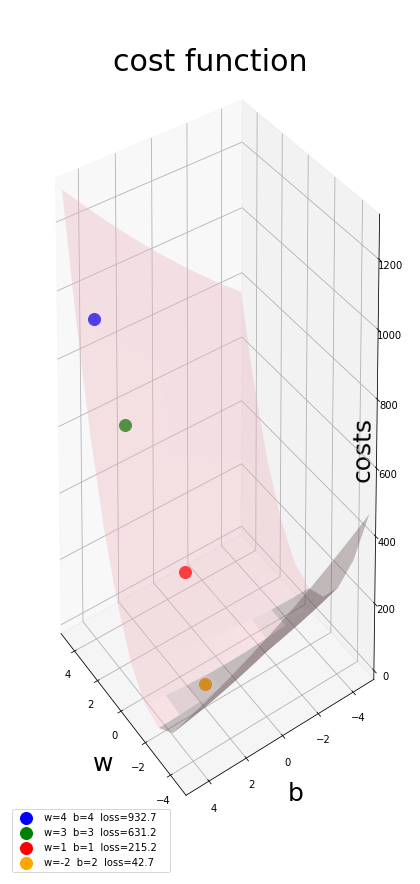

In [ ]:
plot_mse_landscape(
    xs=CHIPMUNK_DATA['weeks'],
    ys=CHIPMUNK_DATA['level'],
    sample_wb_points=[[4, 4], [3, 3], [1, 1], [-2, 2]]
)

OK, now we'z talkin' business! 

We can clearly see the beautiful landscape and how easy it is to spot the bottom of the mountain. 

Now, no matter where we start our hike on the mountain (i.e. initial random $\large w$ and $\large b$ that we choose), we can still easily descend to the valley. 

<br>

Question is: how can we automate this? Answer: **Gradient Descent**.

## Mathematical Diversion

### Intro


While we're not going to go down the rabbit hole of Calculus, we will give a brief intro on **derivatives**. 

<br>

---

Looking at the above Loss Landscape, you might ask: can't we just pick any model and apply this same technique to its loss function? 

In short, the answer is no, and here's why:
- Our model only has two parameters, $\large w$ and $\large b$, and hence we can visualize it in 3D using the actual loss as the 3rd dimension. However, if our model would have even one more parameter, we would no longer be able to visualize it in 3D. If you can visualize 4D - cool, but I'll pass. Now imagine trying to create a landscape for GPT-3 which has 175 billion parameters! Yikes!
- More importantly, notice how we needed to run the loss function on many combinations of $\large w$ and $\large b$ in order to generate the landscape. On a model like GPT-3 that would be expensive to compute (to say the least).

<br>

That being said, the critical idea to remember is that, even though we may not be able to visualize nor compute the landscape, it still **does** exist. 

What we'll discuss next is that it is possible to learn your immediate surroundings in the mountain very easily - you might not be able to see the entire landscape but you can see right in front of you, and thereby slowly make your way down the hill. This would be analogous to hiking in the dark with only a flashlight.

![](https://drive.google.com/uc?id=1oHWxM967zhD_UCQDTqbcAYdH0FZ-JHX2)






### The Derivative

Hmmm, so if we can't see Loss Mountain, how can we figure out where the deepest valley is in order to minimize the loss? 

This is where we'll need to thank Isaac Newton and Gottfried Leibniz. 

![](https://drive.google.com/uc?id=11HFLuj8-T72DQQhZo3K2uxYMBoTCrq_F)

They invented a special mathematical machine where you can drop in a function $\large f(x)$ and you'll get back a new function $\large f^{\prime}(x)$. 

This $\large f^{\prime}(x)$ function is really cool: whatever $\large x$ you pass in it will tell what the slope is for that $\large x$ in the original $\large f(x)$ mountain landscape. 

> This function is called the **derivative** being that it is _derived_ entirely from the original function.

<br>





---

We don't have time here to discuss the details on how to take any function and derive from it its derivative function. 

However, let's at least plot some examples so we can see what these derivatives mean to gain some intuition.

### Definition

The derivative is defined as:

$\large f^{\prime}(x) \equiv \lim_{\delta\to\infty} \frac{f(x + \delta) - f(x)}{\delta}$

In other words, we want the $\large \frac{rise}{run}$ for an infinitely small run.

In [ ]:
Image(url='https://drive.google.com/uc?id=12d2Qwvsow6jn0pjnv0YPVCT-r15NXMw8')

### Various Notations

Each of these notations has the same meaning — the derivative of a function (with respect to $\large x$).

![](https://drive.google.com/uc?id=1L4t_sDoToB9vcxUoiKgnsZ4pQd7o9qYm)

### Example 1 - Simple Constant Function

The derivative equals 0 since there’s no change from one value of x to any other value of x (i.e., there’s no slope).

![](https://drive.google.com/uc?id=1lqxsJEr5J_865Rs55Xje5mMdulUgsen6)

There is no "hill", hence there the derivative equals 0:

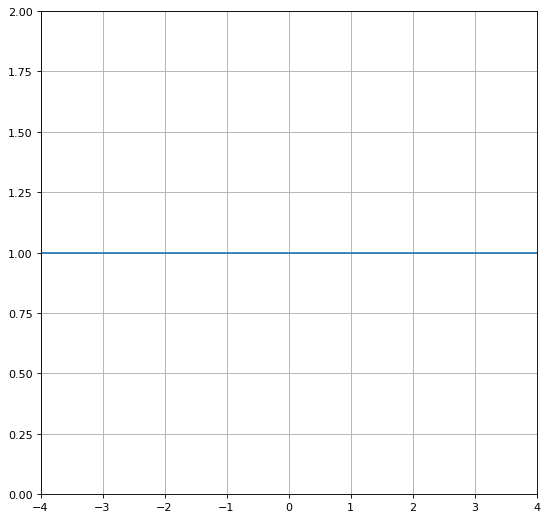

In [ ]:
xs = list(range(-10, 11))
ys = len(xs) * [1]

plt.figure(figsize=(8, 8), dpi=80)
plt.plot(xs, ys)
plt.xlim(-4, 4)
plt.ylim(0, 2)
plt.grid()
plt.show()

### Example 2 - Linear Function



For every change of $x$, the output $y$ changes by the same amount, so $y$ changes one times the $x$.


![](https://drive.google.com/uc?id=11AI-FZn1ddpxfc3dabG1nSnBvxoi084l)

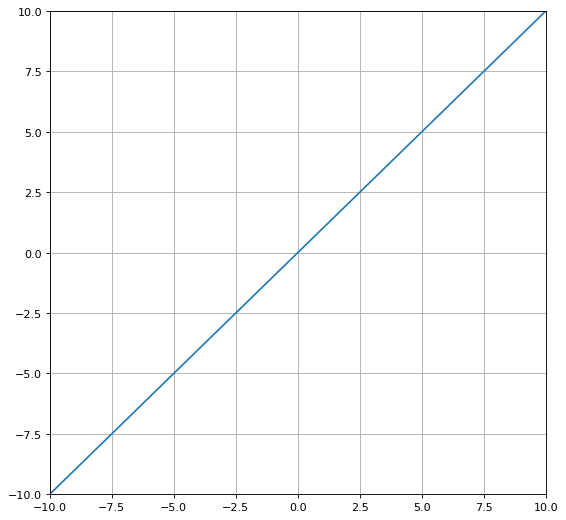

In [ ]:
xs = list(range(-10, 11))
ys = xs

plt.figure(figsize=(8, 8), dpi=80)
plt.plot(xs, ys)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()
plt.show()

### Example 3 - Another Linear Function



![](https://drive.google.com/uc?id=1rg-irbU6L1_jXcIpE3c8b2_XslGayMP5)

> Important note (see step 3 above)
> The derivative of a constant multiple of the function = the constant multiple of the function’s derivative


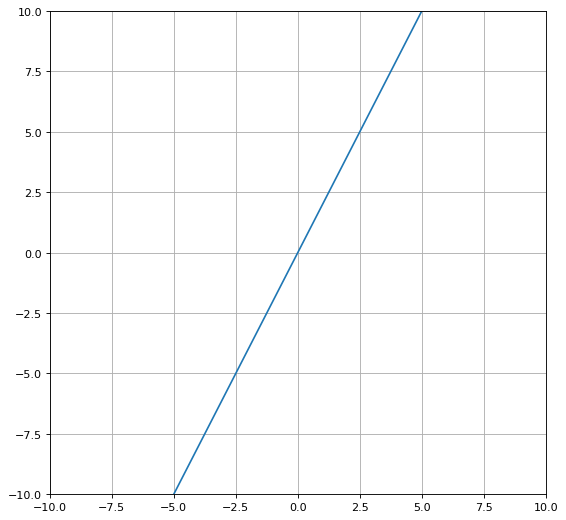

In [ ]:
xs = list(range(-10, 11))
ys = [2*x for x in xs]

plt.figure(figsize=(8, 8), dpi=80)
plt.plot(xs, ys)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()
plt.show()

### Some helper funcs

In [ ]:
def get_tangent_line(x, f, f_prime):    
    m = f_prime(x)
    b = f(x) - f_prime(x) * x

    tangent_line_xs = np.arange(x-2, x+2)
    tangent_line_ys = [m * tangent_line_x + b for tangent_line_x in tangent_line_xs]

    return {
        'xs': tangent_line_xs, 
        'ys': tangent_line_ys,
        'desc': f'at x = {x}: slope = {m}, tangent line = {m}x +{b}'
    }


def plot_function_with_tangent_lines(
    xs,
    f, 
    f_prime, 
    points_for_tangent_lines,
    xlim,
    ylim
):

    tangent_lines = []
    for p in points_for_tangent_lines:
        tangent_lines.append(
            get_tangent_line(
                x=p, 
                f=f, 
                f_prime=f_prime
            ) 
        )
    
    ys = [f(x) for x in xs]

    plt.figure(figsize=(8, 8), dpi=80)

    plt.plot(
        xs, 
        ys    
    )
    
    for tangent_line in tangent_lines:
        plt.plot(
            tangent_line['xs'], 
            tangent_line['ys'],    
            label=tangent_line['desc']            
        )
    
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

### Example 4 - Quadratic Function

$\large f(x) = x^2$

$\large f^{\prime}(x) = \frac{d}{dx} x^2$

$\large f^{\prime}(x) = 2x^1$

$\large f^{\prime}(x) = 2x$

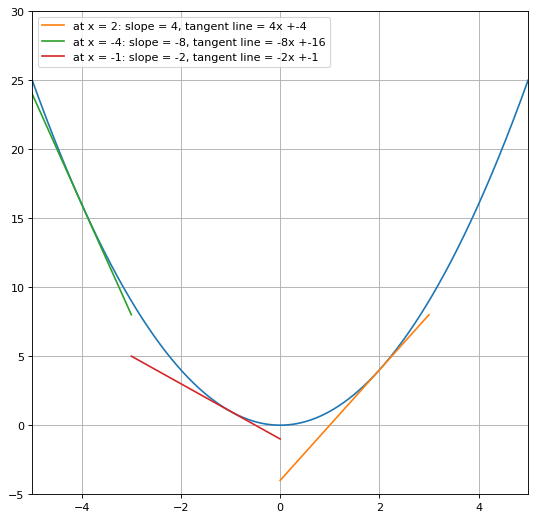

In [ ]:
def f(x):
    return x**2

def f_prime(x):
    return 2*x


plot_function_with_tangent_lines(
    xs=np.arange(-5, 5, .001),
    f=f, 
    f_prime=f_prime, 
    points_for_tangent_lines=[2, -4, -1],
    xlim=(-5, 5),
    ylim=(-5, 30)
)

### Example 5 - Another Quadratic Function



![](https://drive.google.com/uc?id=1bvulfLDPEnDHuuaFpoaV_4As9xShqK3g)

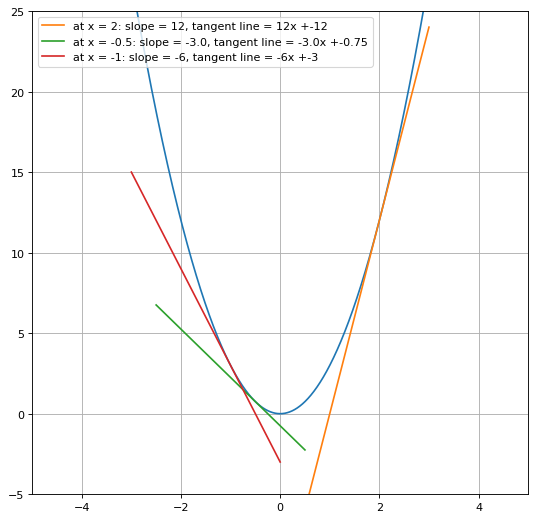

In [ ]:
def f(x):
    return 3*x**2

def f_prime(x):
    return 6*x


plot_function_with_tangent_lines(
    xs=np.arange(-5, 5, .001),
    f=f, 
    f_prime=f_prime, 
    points_for_tangent_lines=[2, -.5, -1],
    xlim=(-5, 5),
    ylim=(-5, 25)
)

### Example 6 - Functions with Addition



The derivative of a sum operation is the sum of derivatives. Same rule applies to subtraction.

![](https://drive.google.com/uc?id=1DdE3wkdmbf7VZkP1T_4ee4Rbjm0Pk8OR)

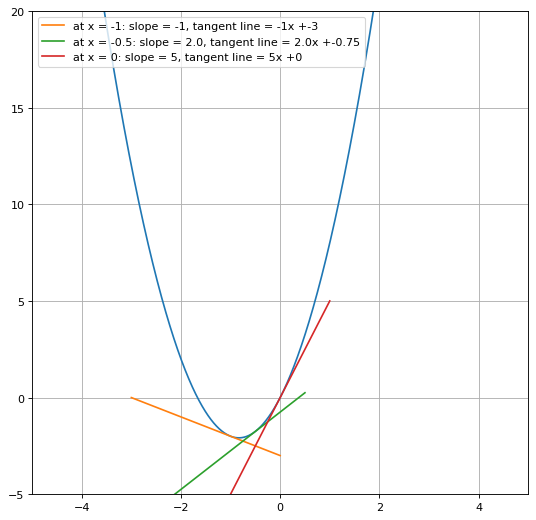

In [ ]:
def f(x):
    return 3*x**2 + 5*x

def f_prime(x):
    return 6*x + 5


plot_function_with_tangent_lines(
    xs=np.arange(-5, 5, .001),
    f=f, 
    f_prime=f_prime, 
    points_for_tangent_lines=[-1, -.5, 0],
    xlim=(-5, 5),
    ylim=(-5, 20)
)

### Example 7



![](https://drive.google.com/uc?id=1njpV7fod8JwCpwSi8ej2mECePSrruvIQ)

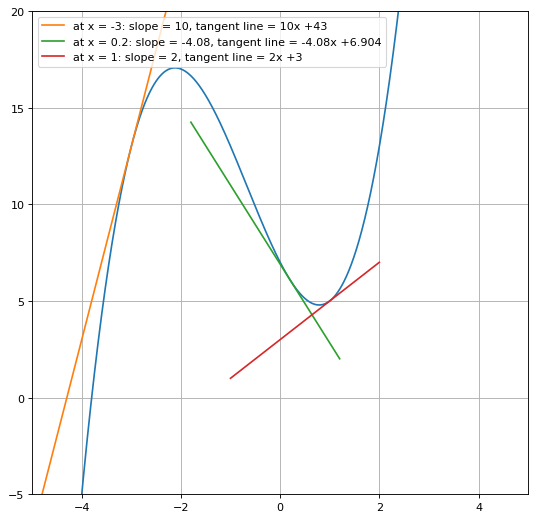

In [ ]:
def f(x):
    return x**3 + 2*x**2 - 5*x + 7

def f_prime(x):
    return 3*x**2 + 4*x -5


plot_function_with_tangent_lines(
    xs=np.arange(-5, 5, .001),
    f=f, 
    f_prime=f_prime, 
    points_for_tangent_lines=[-3, .2, 1],
    xlim=(-5, 5),
    ylim=(-5, 20)
)

### Awesomeness of Totality

We can now formulate a plan of attack to descend a function's landscape:
1. Start at any random position on the mountain by choosing any value of $\large x$
2. Get the derivative function - this will be our _flashlight_ to see at least the area right around us
3. Shine the derivative flashlight around our value of $\large x$ to see which direction points downhill 
4. Move a small step in that direction
5. Repeat steps 3 and 4 until we hit the bottom

Cooolio!

### Partial Derivatives



In the above examples, the functions only had one parameter, in which case the derivative worked great. 

For multiple parameters, as in our loss function, we'll actually need to use **partial derivatives**.  

The method for calculating a partial derivative is very similar to derivatives. For the most part, we just repeat this process for each of the independent inputs.


![](https://drive.google.com/uc?id=1kWuMvP9uMTvOoMllkRMR6u6eTPAuTjlQ)

To gain some intuition, we'll plot this out using our MSE loss function.


### Original Landscape

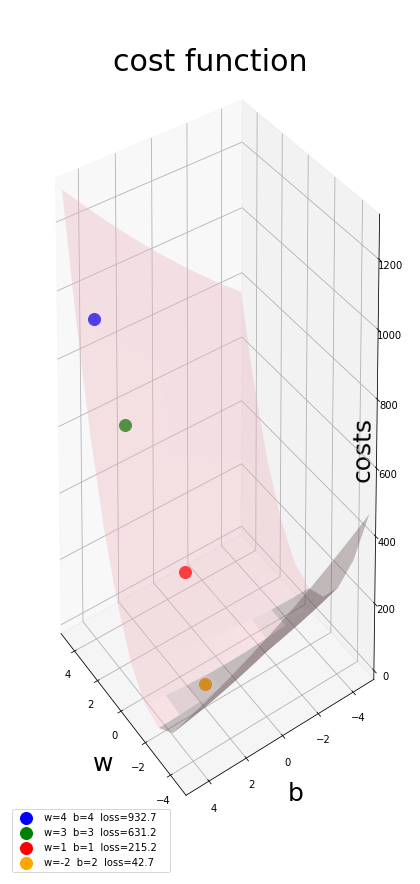

In [ ]:
plot_mse_landscape(
    xs=CHIPMUNK_DATA['weeks'],
    ys=CHIPMUNK_DATA['level'],
    sample_wb_points=[[4, 4], [3, 3], [1, 1], [-2, 2]]
)

### Our MSE Loss Gradient



The **gradient** of our cost function $\large \nabla J(w,b)$:

<br>

$$
\nabla J(w,b)=\left[\begin{array}{c}
\dfrac{\partial J}{\partial w}\\
\dfrac{\partial J}{\partial b}
\end{array}\right]=\left[\begin{array}{c}
\dfrac{2}{n} \sum_{i=1}^{n} - x_{i} (y_{i} - (wx_{i} + b))  \\
\dfrac{2}{n} \sum_{i=1}^{n} - (y_{i} - (wx_{i} + b))  \\
\end{array}\right]
$$

- $\dfrac{\partial J}{\partial w}$: partial derivatives of $J$ with respect to $w$

- $\dfrac{\partial J}{\partial b}$: partial derivatives of $J$ with respect to $b$

<br>

By constantly moving our parameters in the opposite direction of the current gradient $\nabla J$, we can stepwise reduce the costs $J$. 



### Landscape with sample gradients

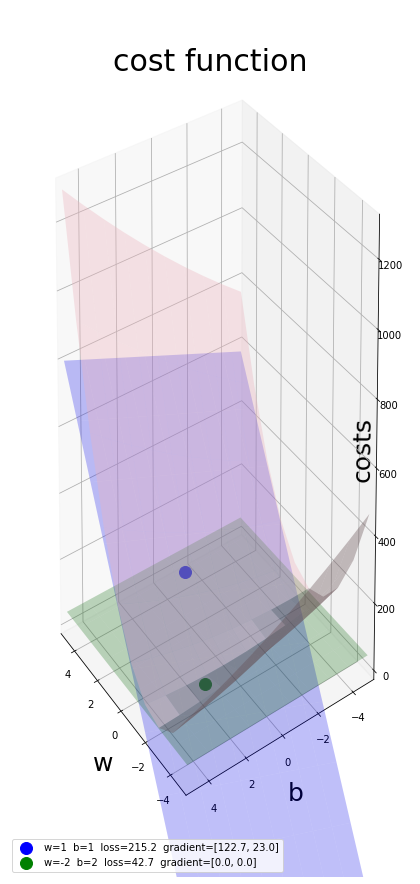

In [ ]:
plot_mse_landscape(
    xs=CHIPMUNK_DATA['weeks'],
    ys=CHIPMUNK_DATA['level'],
    sample_wb_points=[[1, 1], [-2, 2]],
    show_planes=True
)

### We'z done!

Cool! Now we have a way to desend our loss function mountain.


Let's rehash our plan:

1. Start at any position on the mountain by choosing random values of $\large w$ and $\large b$
2. Get the gradient function (for all partial derivatives) - this will be our _flashlight_ to see at least the area right around us
3. Shine the flashlight around our values of $\large w$ and $\large b$ to see which direction points downhill 
4. Move a small step in that direction
5. Repeat steps 3 and 4 until you hit the bottom

In [ ]:
Image(url='https://drive.google.com/uc?id=1Ob73yWtUc6b2xXHMc8DEdyc4AkBprc4I')

## Descending the Mountain

We're ready to descend; however, there is one last thing we need to decide on: how big will each step be? In other words, what is the learning rate?

### Learning Rate

The **learning rate** is the size of the steps, denoted as $\large \alpha$, we take to reach the (local/global) minimum of $J$.

When training our model, our objective is to repeat the following for each epoch until we reach convergence:

$$
w = w - \alpha \dfrac{\partial J(w,b)}{\partial w}
$$

<br>

$$
b = b - \alpha \dfrac{\partial J(w,b)}{\partial b}
$$

<br>

In our code below we'll use: `lr=0.001`

## The Code

### Simple linear regression model

In [ ]:
class LinearRegression(object):
    def __init__(self, w=1, b=1, lr=0.01): 
        self.lr=lr
        self.w=np.array([[w]])
        self.b=np.array([b])

    def cost(self,x,y):     
        pred = x@self.w+self.b  # predicted y-values
        e=y-pred                # error term
        return np.mean(e**2)    # mean squared error

    def fit(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        dJ_dw=(np.mean(e*(-2*x), axis=0))    # partial derivate of J with respect to w
        dJ_db=(np.mean(e*(-2),axis=0))       # partial derivate of J with respect to b
        self.w = (self.w.T-self.lr*dJ_dw).T  # update w
        self.b = self.b - self.lr*dJ_db      # update b

    def predict(self, x):
        return (x @ self.w.T + self.b)  # return predicted values

    def params(self):
        return (self.w,self.b)   # return parameters

### Train model

In [ ]:
# set initial parameters and learning rate 
model=LinearRegression(
    w=3,
    b=-1,
    lr=0.001
) 

# Get the training data:
x_train = CHIPMUNK_DATA['weeks']
y_train = CHIPMUNK_DATA['level']

# Set some lists up to store info as we run training loop:
w_list=[]    # weights
b_list=[]    # biases
c_list=[]    # costs 
ys_list=[]   # predicted y-values for xs (regression line) 
cl_list = [] # predicted y-values for x_train (to be used for plotting connecting lines) 

# set x-values for regression line plot
xs= np.array([[-3], [10]])

for i in range(60000):                          # set number of epochs
    w_list.append(model.params()[0])            # append weights
    b_list.append(model.params()[1])            # append biases
    c_list.append(model.cost(x_train,y_train))  # append costs to list
    ys_list.append(model.predict(xs).T)         # append pairs of predicted y-values for xs 
    cl_list.append(model.predict(x_train).T)    # append predicted y-values for x_train to list
    model.fit(x_train, y_train)                 # fit model

### Result

In [ ]:
print("weight     : " + str( model.params()[0]) )  
print("y-intercept: " + str( model.params()[1]) )
print("costs      : "+ str(model.cost(x_train, y_train))) 

weight     : [[-2.]]
y-intercept: [2.]
costs      : 42.66666666666668


### Compare result with sklearn


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[-2.]]
[2.]


## Animation 1

Note, the coolest plot, which shows the 3D descent of the mountain, is shown last (in animation 3). The first two plots are to whet the appetite.

### Define the epochs to record and plot


These rather basic plots reveal a very important characteristic of gradient descent: if set up correctly, costs drop rapidly and parameter values change noticeably at the beginning of gradient descent. 

With rising epochs, only minor changes to costs and parameter values can be observed. Therefore, plotting all values we initially stored seems unfavorable. 

While predominantly focusing on the first epochs of the fitting process we can visualize most of the ‘action’ without crashing Python while generating these resource-intensive animations. 

After trying out some different selections of points to plot, I decided to record/plot:
- first 50 epochs continuously
- followed by every 5th till 100
- followed by every 200th till 12,000. 

In [ ]:
# Define which epochs/data points to plot
a=np.arange(0,50,1).tolist()
b=np.arange(50,100,5).tolist()
c=np.arange(100,12000,200).tolist()
p = a+b+c # points we want to plot

# Turn lists into arrays
w= np.array(w_list).flatten()
b= np.array(b_list).flatten()
c= np.array(c_list).flatten()
ys = np.array(ys_list) 
p=np.array(p)

### Create animation

In [ ]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [ ]:
fig = plt.figure(figsize=(10,10)) 
labelsize_ = 14
camera = Camera(fig)  

for i in p:
    ax1=fig.add_subplot(3, 2, 2)  
    ax1.plot(w[0:i], color='blue', linestyle="dashed", alpha=0.5)
    ax1.set_title("w", fontsize=17)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis. 
    ax2.plot(b[0:i], color='red', linestyle="dashed", alpha=0.5)
    ax2.set_title("b", fontsize=17)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax3=fig.add_subplot(3, 2, 6, sharex=ax1) 
    ax3.plot(c[0:i],color='black',linestyle="dashed")
    ax3.set_title("costs", fontsize=17)
    ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax3.set_xlabel("epochs", fontsize=14, labelpad=10)

    ax0=fig.add_subplot(1, 2, 1) # plot fit
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(),
                 color='r', label=str(i))  # set legend; flatten arrays to get plots!
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])

    plt.tight_layout()
    camera.snap() # take snapshot after each frame/iteration

# Stop the static plot from displaying
plt.close()    

> Note: next cell takes about 20 seconds to complete in Colab

In [ ]:
anim = camera.animate(interval = 100, repeat = True, repeat_delay = 500)

HTML(anim.to_html5_video())

In [ ]:
# Print final parameters and costs portrayed in animations 
print("Slope: " + str(w[i])) 
print("y-intercept: " + str(b[i])) 
print("final costs: " + str(c[i]))

Slope: -1.9933280497098227
y-intercept: 1.9653553483257509
final costs: 42.6669125993761


## Animation 2

We'll plot the cost function with respect to the parameters $w$ and $b$.

In addition, we'll add connection lines (dashed) between the regression line and our training data to portray the respective residuals.

In [ ]:
fig = plt.figure(figsize=(10,10))
camera = Camera(fig)

for i in p: # use the same points to plot as before 
    ax0=fig.add_subplot(2, 1, 1) 
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(), color='r', label=str(i))
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.vlines(x_train.T, ymin=y_train.T, ymax=cl_list[i],
               linestyle="dashed",color='r',alpha=0.3)    # plot connecting lines
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])
    
    ax1=fig.add_subplot(2, 2, 3) 
    ax1.plot(w[i], c[i], marker='x', markersize=13, color="orangered")
    ax1.plot(np.array(w_list).flatten(),np.array(c_list).flatten() ,
             linestyle='dashed', color="blue")
    ax1.set_xlabel("w", fontsize=25)
    ax1.set_ylabel("costs", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(2, 2, 4, sharey=ax1) 
    ax2.plot(b[i], c[i], marker='x', markersize=13, color="orangered")
    ax2.plot(np.array(b_list).flatten(),np.array(c_list).flatten() ,
             linestyle='dashed', color="red")
    ax2.set_xlabel("b", fontsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)
    
    plt.tight_layout()
    camera.snap()

# Stop the static plot from displaying
plt.close() 

> Note: next cell takes about 20 seconds to complete in Colab

In [ ]:
anim = camera.animate(interval = 100, repeat = True, repeat_delay = 500)

HTML(anim.to_html5_video())

## Animation 3

Referring to the aforementioned ‘mountain’-analogy, creating a 3D visualization of gradient descent seems desirable. 

As done in the begining of this notebook, this requires some preliminary work, since we have to create some data points we never encountered during the fitting process. 

In other words, we need to **compute costs for every possible pair of `w` and `b`** over a predefined range of parameter values to obtain a surface plot. 


### Mesh it up

In [ ]:
def cost_3d(x,y,w,b):  # predicts costs for every pair of w and b. 
        pred = x@w.T+b                       
        e=y-pred
        return np.mean(e**2)        

In [ ]:
ws = np.linspace(-5, 5.0, 10) # set range of values for w and b for surface plot
bs = np.linspace(-5, 5, 10)
M, B = np.meshgrid(ws, bs) # create meshgrid

In [ ]:
zs = np.array([
    cost_3d(
        x_train,
        y_train,
        np.array([[wp]]), 
        np.array([[bp]])
        )  
    for wp, bp in zip(np.ravel(M), np.ravel(B))
])

Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

### Create animation

In [ ]:
fig = plt.figure(figsize=(10,10))  
ax1=fig.add_subplot(121)
ax1.set_title("Linear fit", fontsize=30 )
ax2 = fig.add_subplot(122, projection='3d') # projection='3d'
ax2.set_title("cost function", fontsize=30)
ax2.view_init(elev=20., azim=145)           # set view
camera = Camera(fig)

for i in p:       
    leg=ax1.plot(xs.T.flatten(),ys[i].flatten(), color='r', label=str(i))  
    ax1.vlines(x_train.T, ymin=y_train.T, ymax=cl_list[i], linestyle="dashed",
               color='r',alpha=0.3)
    ax1.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax1.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15) 
    ax1.set_xlabel("x", fontsize=25, labelpad=10)
    ax1.set_ylabel("y", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=15) 
    ax1.set_ylim([-20, 10])
    
    ax2.plot_surface(M, B, Z, rstride=1, cstride=1, color='b',
                     alpha=0.35) # create surface plot
    ax2.scatter(w[i],b[i],c[i],marker='o', s=12**2, color='orange' )
    ax2.set_xlabel("w", fontsize=25, labelpad=10)
    ax2.set_ylabel("b", fontsize=25, labelpad=10)
    ax2.set_zlabel("costs", fontsize=25,
    labelpad=-35) # negative value for labelpad places z-label left of z-axis.
    ax2.tick_params(axis='both', which='major', labelsize=15) 
    ax2.plot(w[0:i],b[0:i],c[0:i], linestyle="dashed",linewidth=2,
             color="grey") # (dashed) lineplot
    
    plt.tight_layout()
    camera.snap()

# Stop the static plot from displaying
plt.close() 

> Note: next cell takes about 1 minute to complete in Colab

In [ ]:
anim = camera.animate(interval = 100, repeat = True, repeat_delay = 500)

HTML(anim.to_html5_video())

### Important Note

Keep in mind that gradient descent actually does not involve moving in the z-direction at all since only parameters are free to vary. 

If you google for visualizations of gradient descent, you'll probably see a trajectory that starts from a point and heads to a minima, just like the animation presented above. 

However, this gives you a very inaccurate picture of what gradient descent really is. The trajectory we take is entire confined to the **x-y plane**, the plane containing the weights (and biases).

Gradient descent doesn't involve moving in the z direction at all. This is because only the weights are the free parameters, described by the x and y directions. The actual trajectory that we take is defined in the x-y plane as follows.


![](https://drive.google.com/uc?id=1Y1zOW2BEJ_weWSNo6KhWW5JQBDQh82JQ)

Each point in the x-y plane represents a unique combination of weights, and we want to have a sets of weights described by the minima.